In [11]:
# Library imports

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import itertools

In [12]:
# Read CSV

df = pd.read_csv('breast_cancer.csv')
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [13]:
# Prepare your dataset

# Drop the first column
df = df.drop(df.columns[0], axis=1)

# Assign the columns a more descriptive name
df.columns = ['thick', 'size_uni', 'shape_uni', 'marg_adh', 'size_sec', 'bare_nuc', 'bland_chromo', 'norm_chromo',
              'mitosis', 'outcome']

# Remove any rows with missing data
df = df[df.bare_nuc != '?']
df = df.reset_index(drop=True)

# Cast all remaining values to integers
df = df.astype(int)

# Change the outcome values from 2 and 4 to 0 and 1
df['outcome'] = df['outcome'].replace(2, 0)
df['outcome'] = df['outcome'].replace(4, 1)

df

,thick,size_uni,shape_uni,marg_adh,size_sec,bare_nuc,bland_chromo,norm_chromo,mitosis,outcome
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1
...,...,...,...,...,...,...,...,...,...,...
677,3,1,1,1,3,2,1,1,1,0
678,2,1,1,1,2,1,1,1,1,0
679,5,10,10,3,7,3,8,10,2,1
680,4,8,6,4,3,4,10,6,1,1


In [14]:
# Implement a function metrics(y, ypred) that returns the accuracy, precision, recall, and F1 score of the model.

def metrics(y, ypred):
    # Calculate the true positives, true negatives, false positives, and false negatives
    tp = np.sum(np.logical_and(y == 1, ypred == 1))
    tn = np.sum(np.logical_and(y == 0, ypred == 0))
    fp = np.sum(np.logical_and(y == 0, ypred == 1))
    fn = np.sum(np.logical_and(y == 1, ypred == 0))

    # Calculate the accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calculate the sensitivity
    sensitivity = tp / (tp + fn)

    # Calculate the specificity
    specificity = tn / (tn + fp)

    # Calculate the precision
    precision = tp / (tp + fp)

    # Calculate the F1 score
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    return accuracy, sensitivity, specificity, precision, f1_score

In [15]:
# Implement a function predict(X, w) that returns the predicted class for each row in X.

def predict(X, weights):
    # Initialize the predicted outcomes
    ypred = np.zeros(X.shape[0])

    # Loop through each row in the dataset
    for i, row in enumerate(X):
        # Calculate the predicted outcome
        ypred[i] = np.dot(weights[1:], row) + weights[0]

    # Return the predicted outcomes
    return np.where(ypred >= 0.0, 1, 0)

In [16]:
# Implement the perceptron(data, alpha, epochs) algorithm

def perceptron(data, alpha, epochs):
    # Initialize the weights
    weights = np.zeros(data.shape[1])

    # Initialize the lists to store the metrics
    mpe_list = []
    accuracy_list = []

    # Loop through the epochs
    for epoch in range(epochs):
        # Initialize the mean perceptron error
        mpe = 0

        # Loop through each row in the dataset
        for row in data:
            # Get the features and the outcome
            features = row[:-1]
            outcome = row[-1]

            # Calculate the predicted outcome
            ypred = np.dot(weights[1:], features) + weights[0]

            # Update the weights
            weights[1:] += alpha * (outcome - ypred) * features
            weights[0] += alpha * (outcome - ypred)

            # Calculate the mean perceptron error
            mpe += abs(outcome - ypred)

        # Calculate the mean perceptron error
        mpe = mpe / len(data)

        # Calculate the model accuracy
        ypred = predict(data[:, :-1], weights)
        accuracy = metrics(data[:, -1], ypred)[0]

        # Append the metrics to the lists
        mpe_list.append(mpe)
        accuracy_list.append(accuracy)

    return weights, mpe_list, accuracy_list

In [17]:
# Report the five metrics for your model on the training set.

# Split the data into features and outcomes

X = df.drop('outcome', axis=1)
y = df['outcome']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add the bias term
X = np.c_[np.ones(X.shape[0]), X]

# Convert the data to a numpy array
data = np.c_[X, y]

# Train the model
weights, mpe_list, accuracy_list = perceptron(data, 0.0001, 1000)

# Calculate the model accuracy
ypred = predict(data[:, :-1], weights)
accuracy, sensitivity, specificity, precision, f1_score = metrics(data[:, -1], ypred)

print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.5762463343108505
Sensitivity: 1.0
Specificity: 0.3476297968397291
Precision: 0.45265151515151514
F1 Score: 0.6232073011734028


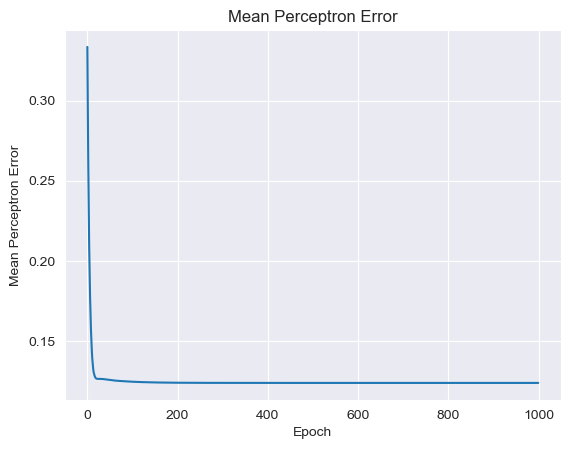

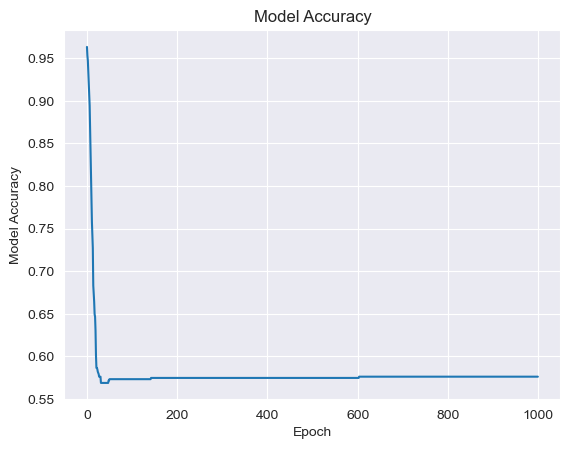

In [18]:
# Plot the Mean Perceptron Error
plt.plot(mpe_list)
plt.title("Mean Perceptron Error")
plt.xlabel("Epoch")
plt.ylabel("Mean Perceptron Error")
plt.show()

# Plot the Model Accuracy
plt.plot(accuracy_list)
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy")
plt.show()

In [19]:
# Rerun the perceptron algorithm on random subsets of the feature attributes.

# Find all permutations of the features
permutations = np.array(list(itertools.product([0, 1], repeat=9)))

# Drop the first column with all 0's
permutations = permutations[1:]

# Create a new 2D results DataFrame with 14 columns
results = pd.DataFrame(np.zeros((permutations.shape[0], 14)),
                       columns=['thick', 'size_uni', 'shape_uni', 'marg_adh', 'size_sec', 'bare_nuc', 'bland_chrono',
                                'norm_chrono', 'mitosis', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision',
                                'F1 Score'])

# Iterate through permutation list and run the perceptron algorithm
for i, permutation in enumerate(permutations):
    # Split the data into features and outcomes

    X = df.drop('outcome', axis=1)
    y = df['outcome']

    # Drop the features that are not in the permutation
    delete = []
    for j, value in enumerate(permutation):
        if value == 0:
            delete.append(j)
    X = X.drop(X.columns[delete], axis=1)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Add the bias term
    X = np.c_[np.ones(X.shape[0]), X]

    # Convert the data to a numpy array
    data = np.c_[X, y]

    # Train the model
    weights, mpe_list, accuracy_list = perceptron(data, 0.0001, 1000)

    # Calculate the model accuracy
    ypred = predict(data[:, :-1], weights)
    accuracy, sensitivity, specificity, precision, f1_score = metrics(data[:, -1], ypred)

    modelMetrics = [accuracy, sensitivity, specificity, precision, f1_score]

    # Add the permutations and metrics to the result list
    results.iloc[i, :9] = permutation
    results.iloc[i, 9:] = modelMetrics

print(results)

     thick  size_uni  shape_uni  marg_adh  size_sec  bare_nuc  bland_chrono  \
0      0.0       0.0        0.0       0.0       0.0       0.0           0.0   
1      0.0       0.0        0.0       0.0       0.0       0.0           0.0   
2      0.0       0.0        0.0       0.0       0.0       0.0           0.0   
3      0.0       0.0        0.0       0.0       0.0       0.0           1.0   
4      0.0       0.0        0.0       0.0       0.0       0.0           1.0   
..     ...       ...        ...       ...       ...       ...           ...   
506    1.0       1.0        1.0       1.0       1.0       1.0           0.0   
507    1.0       1.0        1.0       1.0       1.0       1.0           1.0   
508    1.0       1.0        1.0       1.0       1.0       1.0           1.0   
509    1.0       1.0        1.0       1.0       1.0       1.0           1.0   
510    1.0       1.0        1.0       1.0       1.0       1.0           1.0   

     norm_chrono  mitosis  Accuracy  Sensitivity  S

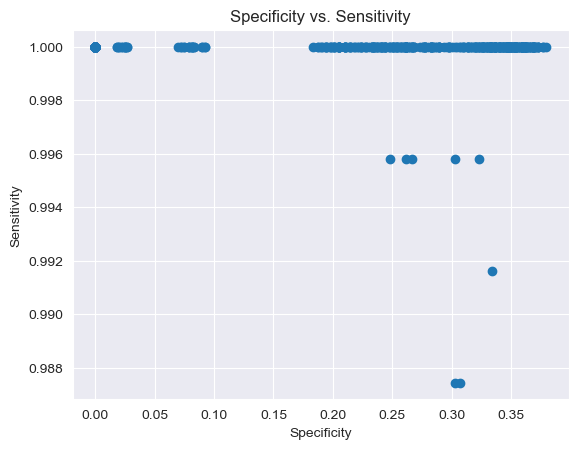

In [20]:
# For the various models generated, plot specificity (x-axis) vs. sensitivity (y-axis).

plt.scatter(results['Specificity'], results['Sensitivity'])

plt.xlabel("Specificity")

plt.ylabel("Sensitivity")

plt.title("Specificity vs. Sensitivity")

plt.show()

In [49]:
# Report the best model and its metrics.

# Find the best model
print(results['Accuracy'].idxmax())
print(results['Sensitivity'].idxmax())
print(results['Specificity'].idxmax())
print(results['Precision'].idxmax())
print(results['F1 Score'].idxmax())
bestModel = results.iloc[results['Precision'].idxmax()]

# Print the best model
print(bestModel)

# I chose to use model 269 which uses the thick, bare_nuc, bland_chrono, and norm_chrono features. Coincidentally, this model has the highest accuracy, sensitivity, specificity, precision, and F1 score, so it was a no-brainer. However, in the context of diagnostic applications, I would have prioritized high sensitivity, specificity, and precision if the decision was not so clear-cut.

269
0
269
269
269
thick           1.000000
size_uni        0.000000
shape_uni       0.000000
marg_adh        0.000000
size_sec        0.000000
bare_nuc        1.000000
bland_chrono    1.000000
norm_chrono     1.000000
mitosis         0.000000
Accuracy        0.596774
Sensitivity     1.000000
Specificity     0.379233
Precision       0.464981
F1 Score        0.634794
Name: 269, dtype: float64
